In [1]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import seaborn as sns
import pandas as pd
import folium

## 1. Read data

In [24]:
# should take about 30 sec to read
# hyads_df1 = pd.read_csv("./model_dev_data/hyads_coal_part1.csv", index_col=0)
# hyads_df2 = pd.read_csv("./model_dev_data/hyads_coal_part1.csv", index_col=0)
# hyads_df3 = pd.read_csv("./model_dev_data/hyads_coal_part1.csv", index_col=0)
# hyads_df = pd.concat([hyads_df1, hyads_df2, hyads_df3], 1)
# del hyads_df1, hyads_df2, hyads_df3
# hyads = hyads_df.values  # as numpy
# hyads_df.iloc[:10,:10]

In [25]:
hyads_df = pd.read_csv("./model_dev_data/hyads_zipcode_3digits.csv", index_col=0)
hyads = hyads_df.values

In [26]:
hyads_df

,100,101,102,103,104,105,106,107,108,109,...,990,991,992,993,994,995,996,997,998,999
fid,,,,,,,,,,,,,,,,,,,,,
10,4.605191,4.345238,4.475877,11.062500,5.629630,8.987269,7.061111,5.458333,5.720238,9.642466,...,1.424330,1.264805,1.371599,0.433333,0.0,0.175801,0.380165,0.539282,0.874387,0.777295
1001,41.020492,40.359524,37.561404,37.204861,35.530864,28.273148,28.561111,29.837963,32.595238,29.652968,...,0.000000,0.044776,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1004,38.586066,38.365476,36.868421,31.628472,40.895062,36.802083,37.605556,36.643519,31.297619,35.040868,...,0.000000,0.194030,0.000000,0.000000,0.0,0.028986,0.000000,0.121951,0.316667,0.750000
10043,94.733607,100.936905,91.199561,78.156250,91.438272,70.151620,41.000000,50.097222,47.059524,56.043607,...,0.000000,0.268657,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
10071,26.980874,26.828571,24.640351,27.006944,28.901235,26.668981,23.116667,23.796296,18.386905,31.755479,...,0.125000,0.343284,0.035714,0.000000,0.0,0.014493,0.022472,0.033629,0.500000,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,30.445355,29.897619,28.719298,30.197917,34.012346,33.753472,26.405556,28.467593,29.988095,33.673516,...,0.000000,0.059701,0.000000,0.000000,0.0,0.000000,0.000000,0.128184,0.100000,0.416667
994,36.649590,36.949405,36.843750,37.200521,37.418210,35.687789,32.916667,35.557870,36.346726,35.219635,...,0.078125,0.231343,0.000000,0.027778,0.0,0.050725,0.045412,0.274755,0.490000,0.523810
995,44.054645,43.623810,42.776316,41.604167,44.246914,46.539352,41.016667,43.236111,43.857143,48.331963,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [27]:
# hyads1 = hyads_df.iloc[:,:15000]
# hyads1.to_csv("./model_dev_data/hyads_coal_part1.csv")
# hyads2 = hyads_df.iloc[:,15001:30000]
# hyads2.to_csv("./model_dev_data/hyads_coal_part2.csv")
# hyads3 = hyads_df.iloc[:,30001:-1]
# hyads3.to_csv("./model_dev_data/hyads_coal_part3.csv")

In [28]:
# rows are power plants
# index is fid (power plant id)
# columns zip codes

In [32]:
power_plants = pd.read_csv("./model_dev_data/power_plant_info.csv", index_col=0)
power_plants = power_plants[power_plants.index.isin(hyads_df.index)]
power_plants

,lat,lon
fid,,
3,31.0069,-88.0103
7,34.0128,-85.9708
8,33.6446,-87.2003
10,32.6017,-87.7811
26,33.2442,-86.4567
...,...,...
54755,36.4364,-77.6167
55076,33.3761,-89.2183
55479,44.2862,-105.3843


In [33]:
my_USA_map = './model_dev_data/us-states.json'

In [34]:
fig = folium.Figure(width=630, height=400)
m = folium.Map(location=[39, -96],
               zoom_start=4, 
               zoom_control=False)
for i in range(power_plants.shape[0]):
    loc = power_plants.iloc[i]
    folium.CircleMarker(
        location=loc,
        radius=1.5,
        color="red",
        opacity=0.5
    ).add_to(m)
fig.add_child(m)
m

## 2. Mixture Model

For now, let's fix the number of components

In [36]:
n_comps = 3
n_plants = hyads.shape[0]
# n_zip_samples = 45000
# samples = np.random.choice(hyads.shape[1], size=n_zip_samples)
# hyads0 = hyads[:, samples]

In [37]:
gmm = GaussianMixture(
    n_components=n_comps,
    covariance_type="full")
gmm.fit(hyads)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [38]:
phat = gmm.predict_proba(hyads0)
gmm.converged_

True

In [39]:
colorpal = sns.color_palette("husl", n_comps).as_hex()

In [40]:
labels = np.zeros(n_plants, int)
for i in range(n_plants):
    labels[i] = np.random.choice(n_comps, p=phat[i])
print("Num labels: ", len(np.unique(labels)))
    
fig = folium.Figure(width=630, height=400)
m = folium.Map(location=[39, -96],
               zoom_start=4, 
               zoom_control=False)

comps_to_plot = range(n_comps)
# comps_to_plot = []
for c in comps_to_plot:
    for i in range(n_plants):
        loc = power_plants.iloc[i]
        lab = labels[i]
        if lab == c:
            folium.CircleMarker(
                location=loc,
                radius=5.0,
                color=colorpal[labels[i]],
                stroke=False,
                fill=True,
                fill_opacity=0.9
            ).add_to(m)
m.add_to(fig)

Num labels:  3


In [41]:
cov = gmm.covariances_
cov.shape

(3, 867, 867)

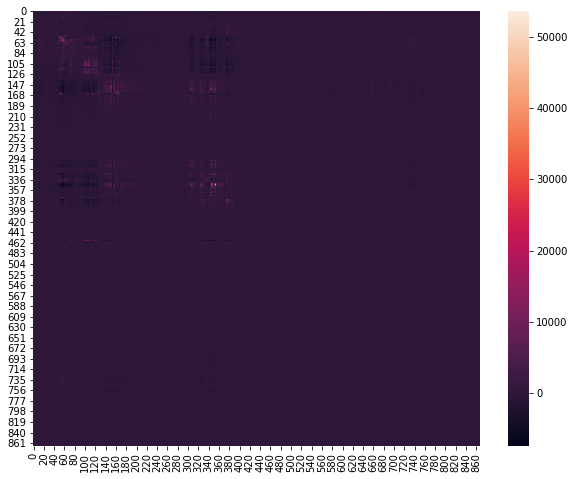

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(cov[0]);

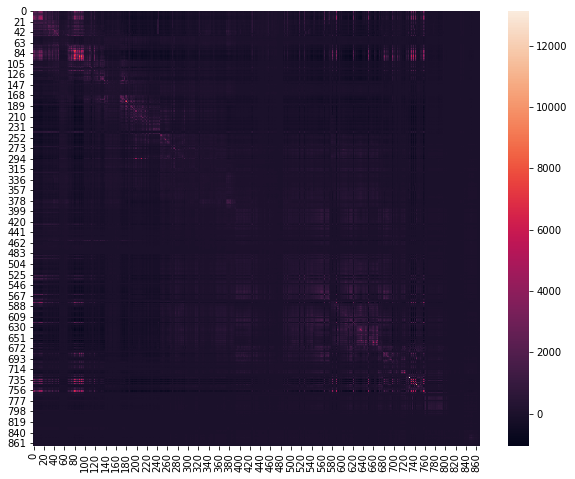

In [44]:
plt.figure(figsize=(10, 8))
sns.heatmap(cov[1]);

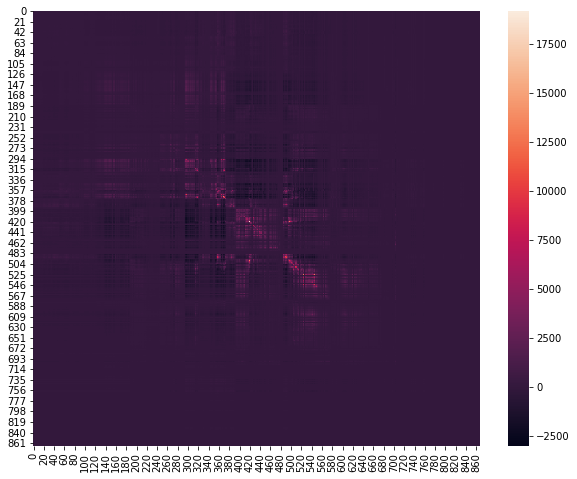

In [45]:
plt.figure(figsize=(10, 8))
sns.heatmap(cov[2]);

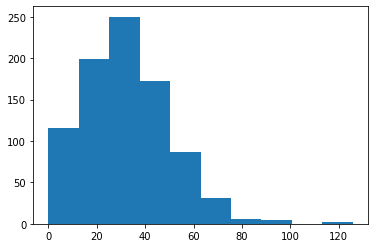

In [46]:
plt.hist(hyads0.std(0));

#### Distribution

How to assign zip codes to plants now?

In [57]:
idx = 10

w = hyads[:,idx] 
w /= w.sum()

(array([315., 100.,  17.,   3.,   4.,   2.,   0.,   2.,   0.,   1.]),
 array([0.00020528, 0.00234745, 0.00448961, 0.00663177, 0.00877394,
        0.0109161 , 0.01305827, 0.01520043, 0.0173426 , 0.01948476,
        0.02162692]),
 <a list of 10 Patch objects>)

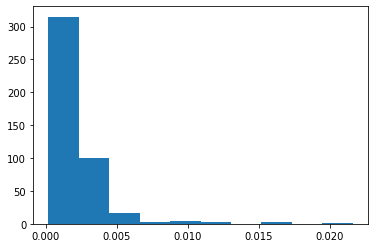

In [59]:
plt.hist(w)